# Investigating Customer Demographics

Are there differences in the age of customers between regions? If so, can we predict the age of a customer in a region based on other demographic data?

We need to investigate Martin’s hypothesis: Is there any correlation between age of a customer and if the transaction was made online or in the store? Do any other factors predict if a customer will buy online or in our stores?


In [275]:
# Importing all of the necessary basics and installed pandas_profiling seperately -DS Basics
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

#SKLearn Stuff
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

#helpers
%matplotlib inline


In [276]:
data = pd.read_csv('/Users/ma25756/Downloads/Demographic_Data.csv')

In [66]:
data.head

<bound method NDFrame.head of        in-store  age  items   amount  region
0             0   37      4   281.03       2
1             0   35      2   219.51       2
2             1   45      3  1525.70       4
3             1   46      3   715.25       3
4             1   33      4  1937.50       1
...         ...  ...    ...      ...     ...
79995         1   71      3   558.82       1
79996         0   59      7  1932.00       3
79997         0   54      1   414.16       2
79998         1   49      4   335.32       1
79999         1   30      1   527.12       3

[80000 rows x 5 columns]>

In [67]:
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [68]:
data.drop_duplicates()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1
...,...,...,...,...,...
79995,1,71,3,558.82,1
79996,0,59,7,1932.00,3
79997,0,54,1,414.16,2
79998,1,49,4,335.32,1


In [69]:
data.drop_duplicates().shape

(79979, 5)

In [70]:
#Created this dictionary to be change the features from numbers to to their appropriate regions. 
#Consider doing this with in-store vs. online purchasing at some point.

Cleanup_region = {'region': {1:'North', 2: 'South', 3: 'East', 4: 'West'}}

In [71]:
data.replace(Cleanup_region, inplace=True)
data.head

<bound method NDFrame.head of        in-store  age  items   amount region
0             0   37      4   281.03  South
1             0   35      2   219.51  South
2             1   45      3  1525.70   West
3             1   46      3   715.25   East
4             1   33      4  1937.50  North
...         ...  ...    ...      ...    ...
79995         1   71      3   558.82  North
79996         0   59      7  1932.00   East
79997         0   54      1   414.16  South
79998         1   49      4   335.32  North
79999         1   30      1   527.12   East

[80000 rows x 5 columns]>

# Exploratory Data Analysis

In [274]:
#Show correlation matrix
corr_mat = data.corr()
print(corr_mat)

          in-store       age     items    amount
in-store  1.000000 -0.178256 -0.003954 -0.085474
age      -0.178256  1.000000  0.000679 -0.282089
items    -0.003954  0.000679  1.000000  0.000367
amount   -0.085474 -0.282089  0.000367  1.000000


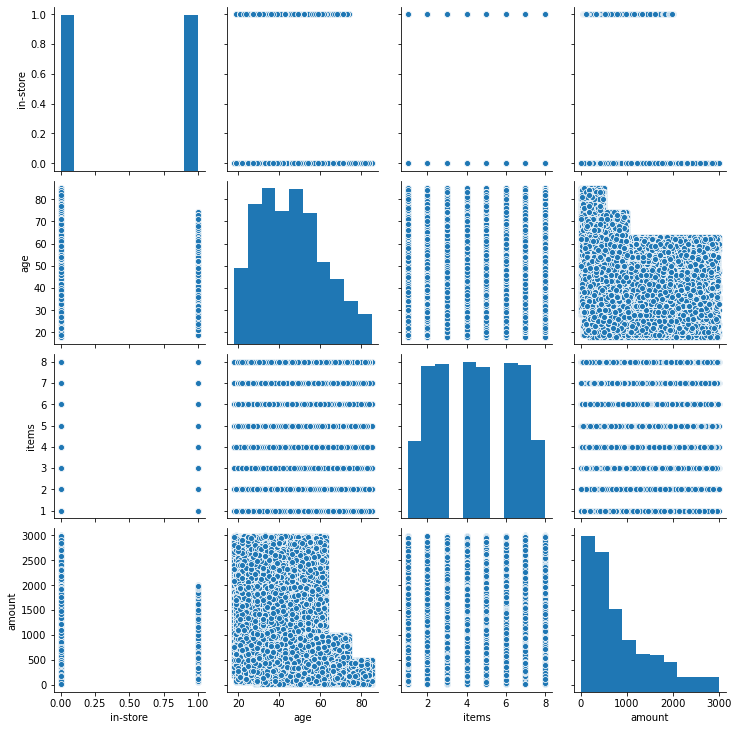

In [19]:
#A pairplot allows us to see both distribution of single variables and relationships between two variables. 
sns.pairplot(data)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


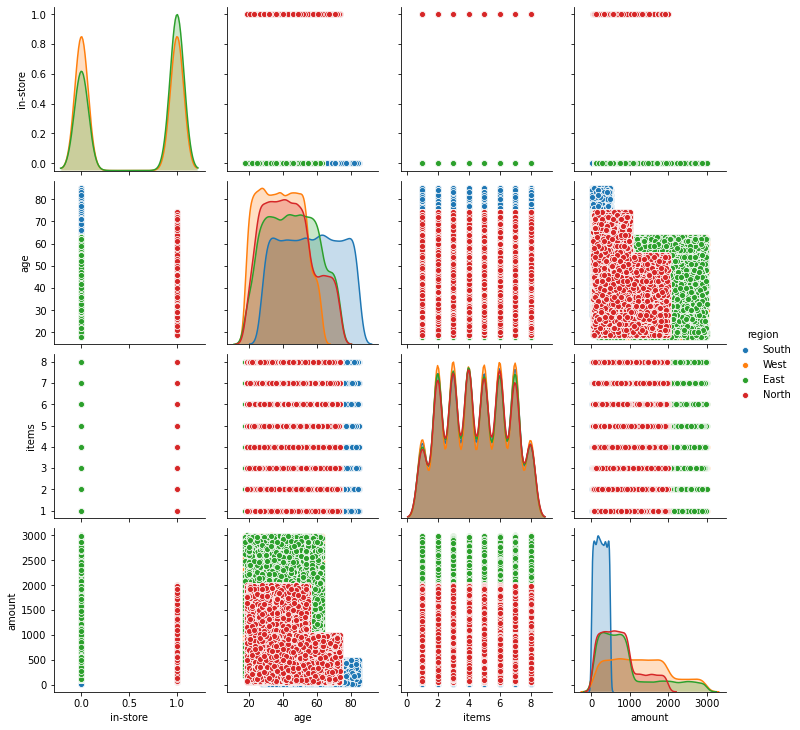

In [20]:
#Hue allows us to make data most valuable by coloring the figures based on categorical variables. In this case, region. 
sns.pairplot(data, hue= 'region')

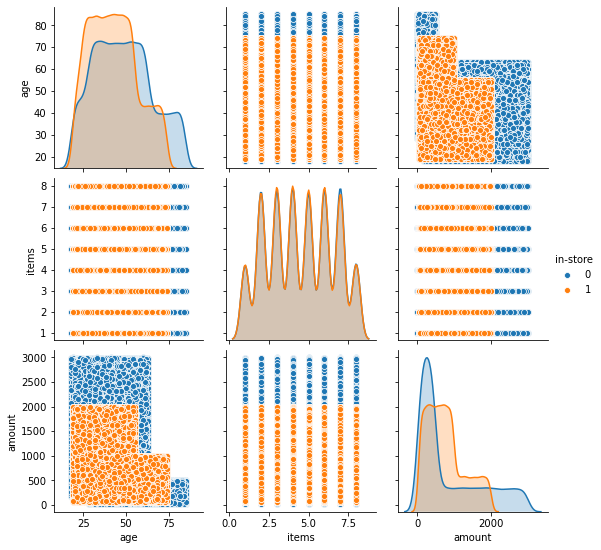

In [21]:
sns.pairplot(data, hue ='in-store')

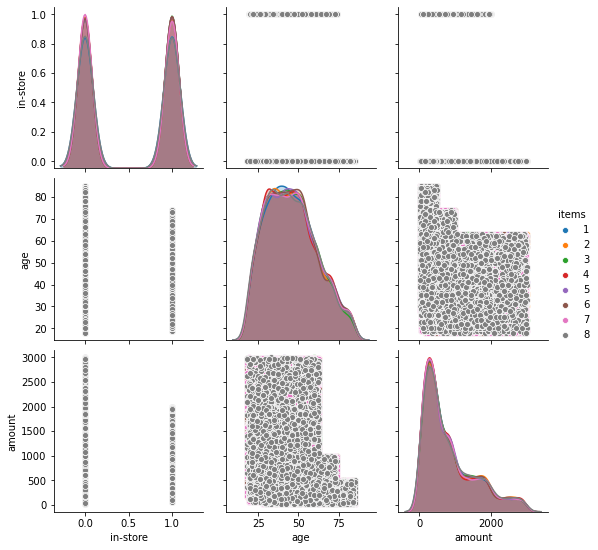

In [10]:
sns.pairplot(data, hue ='items')

In [26]:
data_sample = data.sample(100)

In [54]:
#The following scatter plot will show if there is a correlation between age and in-store purchases. 
#There is not. Sorry, Mike!  
data
x = data_sample['in-store']
y = data_sample ['age']

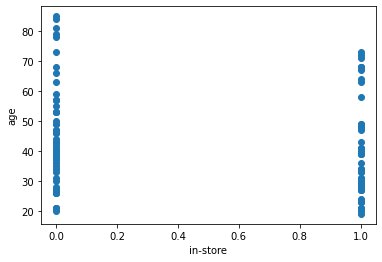

In [56]:
plt.scatter(x,y, marker='o')
plt.xlabel("in-store")
plt.ylabel("age")
plt.show()


### Slicing 

In [72]:
 # Select rows 0, 1, 2 (row 3 is not selected)
data[0:3]

,in-store,age,items,amount,region
0,0,37,4,281.03,South
1,0,35,2,219.51,South
2,1,45,3,1525.70,West


In [73]:
#features
X = data.iloc[:,0:4]
print('Summary of feature sample')
X.head()

Summary of feature sample


,in-store,age,items,amount
0,0,37,4,281.03
1,0,35,2,219.51
2,1,45,3,1525.70
3,1,46,3,715.25
4,1,33,4,1937.50


## Region as the dependant variable
Using decision tree classifier to train the data to make a prediction based upon region. Here I am splitting the data into 70% and testing 30% (test size=.30). I am still unclear what random state indicates.

In [186]:
#dependent variable
y = data['region']

In [187]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [188]:
#Modeling (Classification)
#max depth with 3-5 was best 
dtc = DecisionTreeClassifier(max_depth=5)
dtcFit1 = dtc.fit(X_train,y_train)

In [191]:
#Predictions
dtc1pred = dtcFit1.predict(X_test)

In [193]:
print(classification_report(y_test, dtc1pred))

              precision    recall  f1-score   support

        East       0.55      0.24      0.34      5389
       North       0.41      0.53      0.46      4857
       South       0.90      1.00      0.95      5945
        West       0.65      0.73      0.69      7809

    accuracy                           0.65     24000
   macro avg       0.63      0.63      0.61     24000
weighted avg       0.64      0.65      0.63     24000



In [258]:
from sklearn.tree import plot_tree

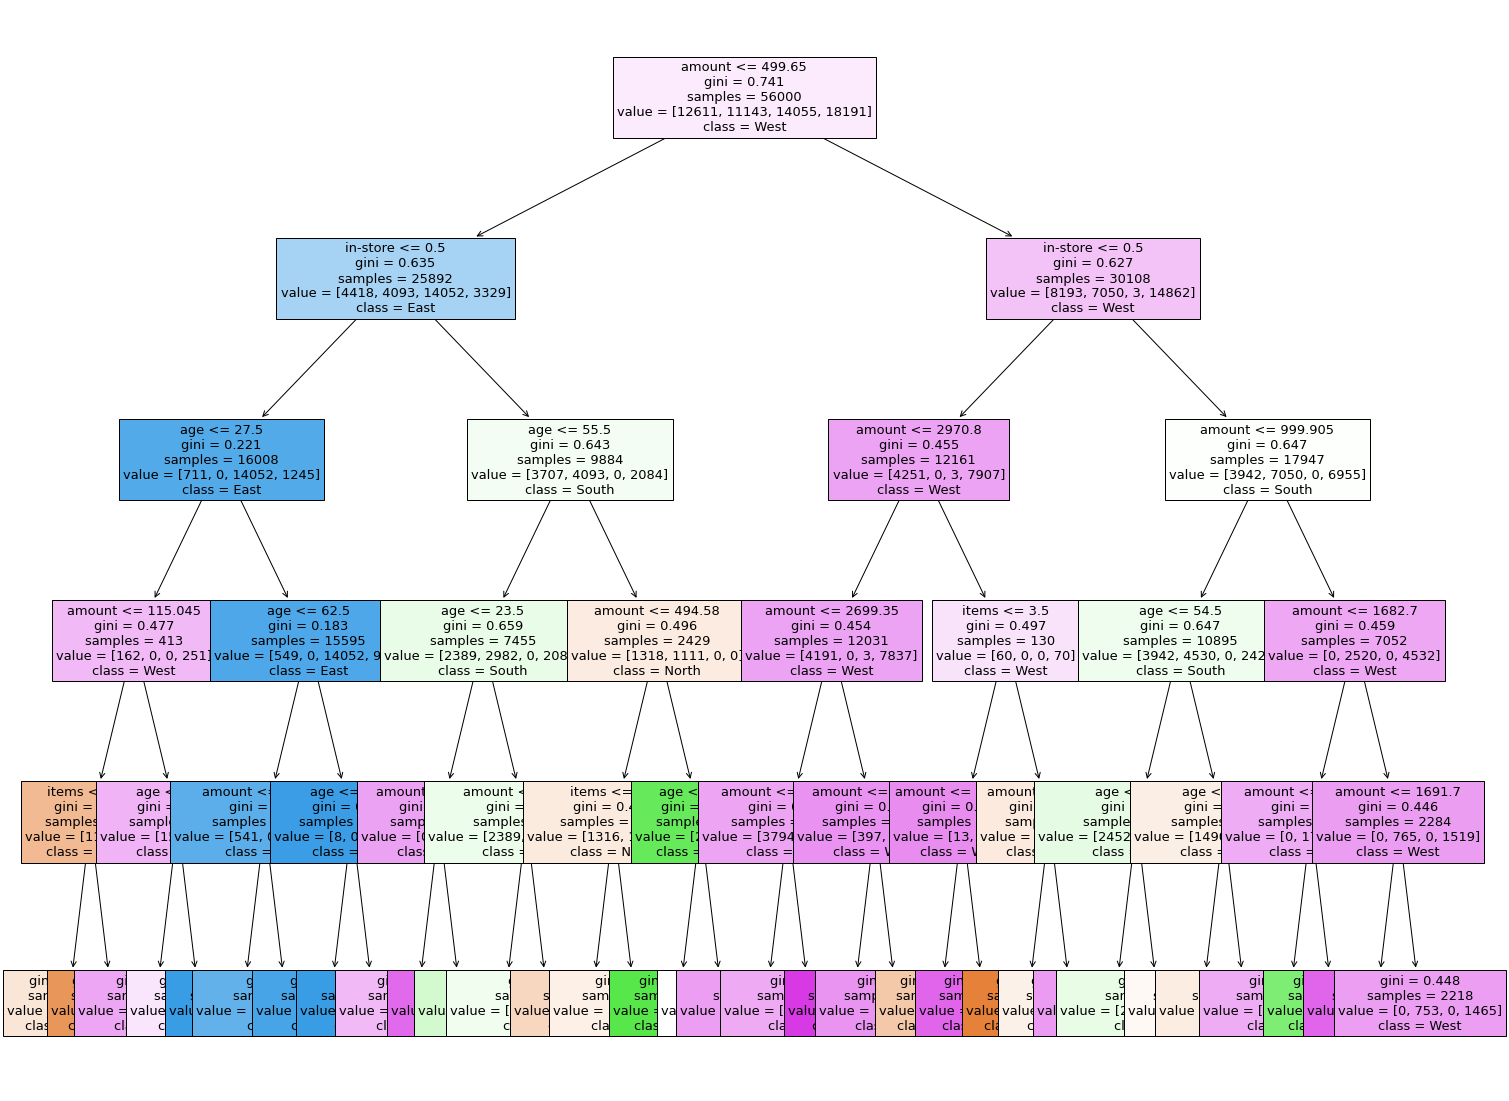

In [52]:
fig = plt.figure(figsize=(25,20))
tree = plot_tree(model, feature_names=X.columns, class_names=['North','South','East','West'], filled=True, fontsize=13)

## Age as the Dependent Variable

### Binning Age Data by Decade
I first began to bin the age data. I did so by using pd.cut and defined the bins by decade. Proved to not entirely fruitful since accuracy was 0. Will try to bin in another way to see if this wil yield a higher accuracy. 

In [45]:
data['age bins']= pd.cut(data['age'], bins=[0,10,20,30,40,50,60,70,80,90],labels=False)
print(data)

       in-store  age  items   amount region  age bins
0             0   37      4   281.03  South         3
1             0   35      2   219.51  South         3
2             1   45      3  1525.70   West         4
3             1   46      3   715.25   East         4
4             1   33      4  1937.50  North         3
...         ...  ...    ...      ...    ...       ...
79995         1   71      3   558.82  North         7
79996         0   59      7  1932.00   East         5
79997         0   54      1   414.16  South         5
79998         1   49      4   335.32  North         4
79999         1   30      1   527.12   East         2

[80000 rows x 6 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1737ef370>,
      dtype=object)

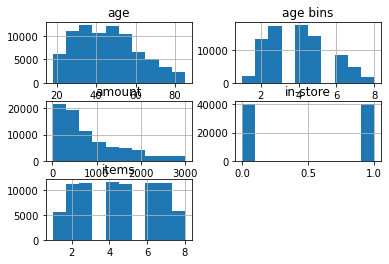

In [57]:
data.hist()


In [194]:
#dependent variable
y = data['age']

In [195]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [196]:
#Modeling (Classification)
#max depth with 3 was best 
dtc = DecisionTreeClassifier(max_depth=3)
dtcFit2 = dtc.fit(X_train,y_train)

In [197]:
#Predictions
dtc2preds = dtcFit2.predict(X_test)

In [198]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
          18       0.00      0.00      0.00      61.0
          19       0.00      0.00      0.00     227.0
          20       0.00      0.00      0.00     294.0
          21       0.00      0.00      0.00     265.0
          22       0.00      0.00      0.00     299.0
          23       0.00      0.00      0.00     285.0
          24       0.00      0.00      0.00     365.0
          25       0.00      0.00      0.00     461.0
          26       0.00      0.00      0.00     424.0
          27       0.00      0.00      0.00     397.0
          28       0.00      0.00      0.00     485.0
          29       0.00      0.00      0.00     542.0
          30       0.00      0.00      0.00     505.0
          31       0.00      0.00      0.00     540.0
          32       0.00      0.00      0.00     549.0
          33       0.00    

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
from sklearn.tree import plot_tree

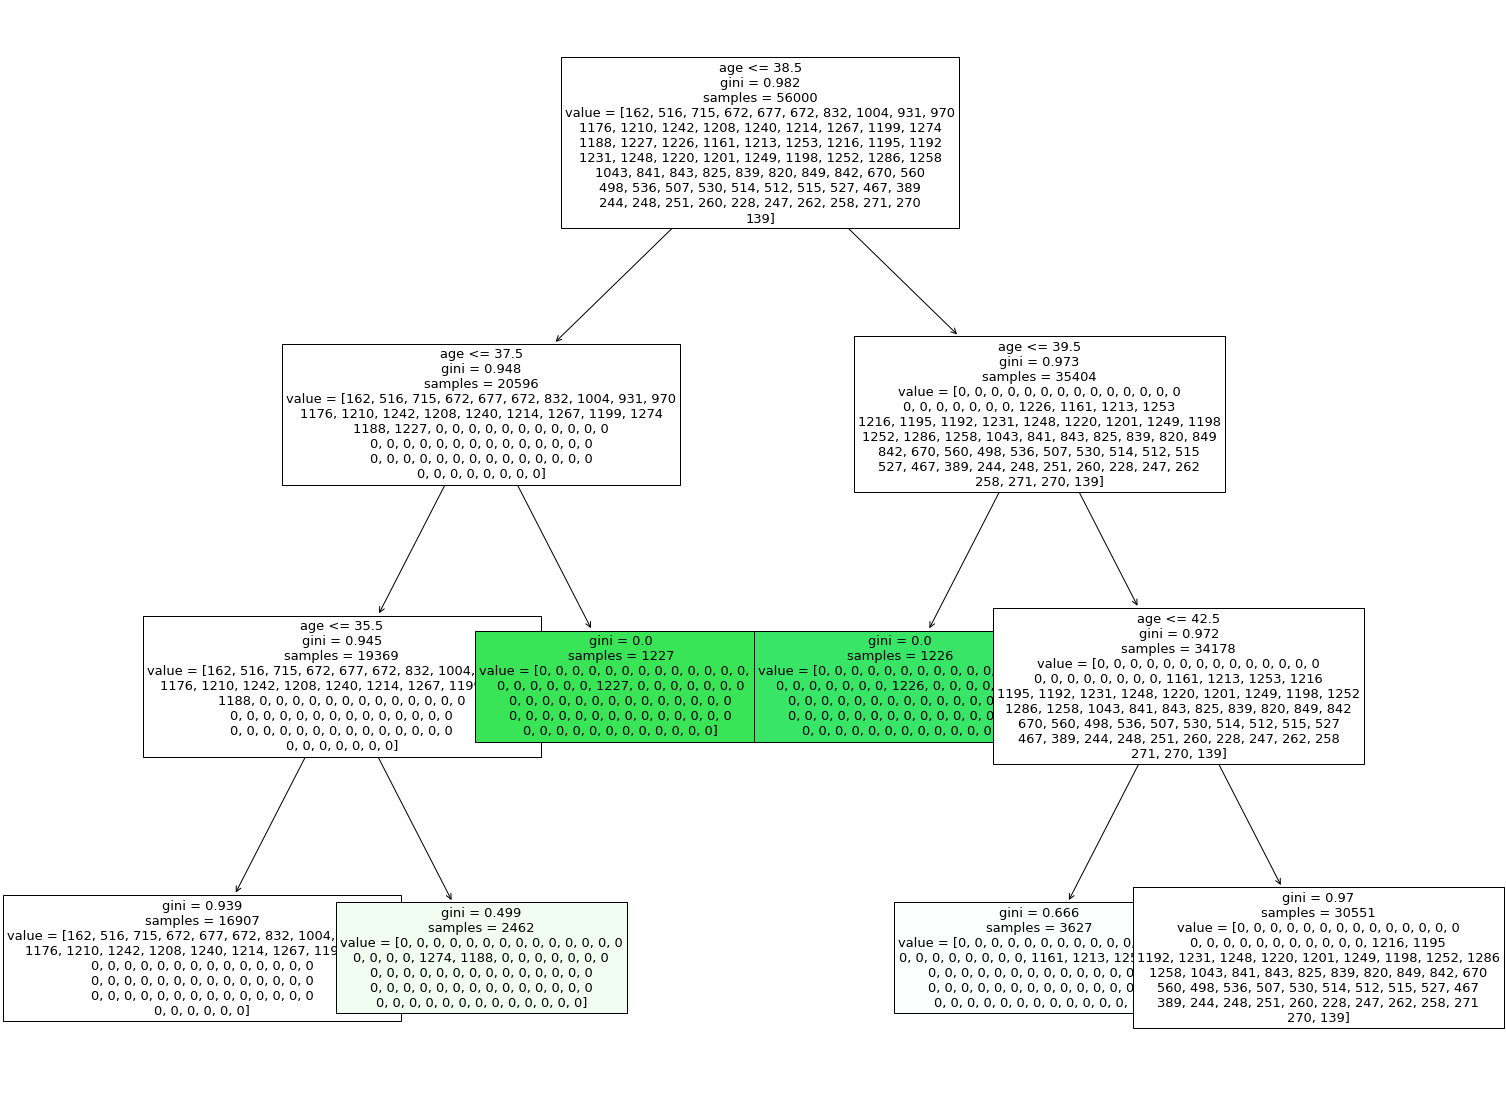

In [98]:
fig = plt.figure(figsize=(25,20))
tree = plot_tree(model, feature_names=X.columns, filled=True, fontsize=13)

### Binning Age in four bins
The followng shows that I intended to bin the data in four equal parts but was not fruitful since the accuracy was .13
It is possible to consider that age cannot be predicted for this task.

In [99]:

data['age_bins'] = pd.cut(data['age'], bins=[4],labels=False)
print(data)

       in-store  age  items   amount  region  age bins  age_bins
0             0   37      4   281.03       2         2       NaN
1             0   35      2   219.51       2         2       NaN
2             1   45      3  1525.70       4         3       NaN
3             1   46      3   715.25       3         3       NaN
4             1   33      4  1937.50       1         2       NaN
...         ...  ...    ...      ...     ...       ...       ...
79995         1   71      3   558.82       1         6       NaN
79996         0   59      7  1932.00       3         4       NaN
79997         0   54      1   414.16       2         4       NaN
79998         1   49      4   335.32       1         3       NaN
79999         1   30      1   527.12       3         1       NaN

[80000 rows x 7 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c7108b0>,
      dtype=object)

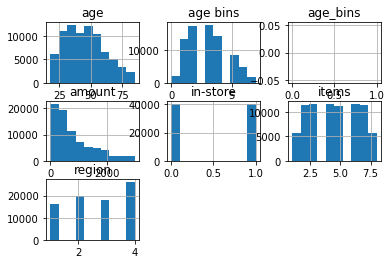

In [100]:
data.hist()

In [199]:
#dependent variable
y = data['age']

In [200]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [201]:
#Modeling (Classification)
#max depth with 3 was best 
dtc = DecisionTreeClassifier(max_depth=3)
dtcFit3 = dtc.fit(X_train,y_train)

In [202]:
#Predictions
dtc3preds = dtcFit3.predict(X_test)

In [203]:

print(classification_report(y_test, dtc3preds))

              precision    recall  f1-score   support

          18       0.00      0.00      0.00        61
          19       0.00      0.00      0.00       227
          20       0.00      0.00      0.00       294
          21       0.00      0.00      0.00       265
          22       0.00      0.00      0.00       299
          23       0.00      0.00      0.00       285
          24       0.00      0.00      0.00       365
          25       0.00      0.00      0.00       461
          26       0.00      0.00      0.00       424
          27       0.00      0.00      0.00       397
          28       0.00      0.00      0.00       485
          29       0.00      0.00      0.00       542
          30       0.00      0.00      0.00       505
          31       0.00      0.00      0.00       540
          32       0.00      0.00      0.00       549
          33       0.00      0.00      0.00       531
          34       0.07      1.00      0.13       516
          35       0.00    

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# In-Store as the Dependent Variable
Utilizing this variable for in-store was  fruitful and yielded a 100% accuracy, precision is 1.00 and a 1.00 recall. Is this correct?

In [259]:
#dependent variable
y = data['in-store']

In [260]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [261]:
#Modeling (Classification)
dtc = DecisionTreeClassifier(max_depth=10)
dtcFit4 = dtc.fit(X_train,y_train)

In [262]:
#Predictions
dtc4preds = dtcFit4.predict(X_test)

In [263]:
print(classification_report(y_test, dtc4preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11831
           1       1.00      1.00      1.00     12169

    accuracy                           1.00     24000
   macro avg       1.00      1.00      1.00     24000
weighted avg       1.00      1.00      1.00     24000



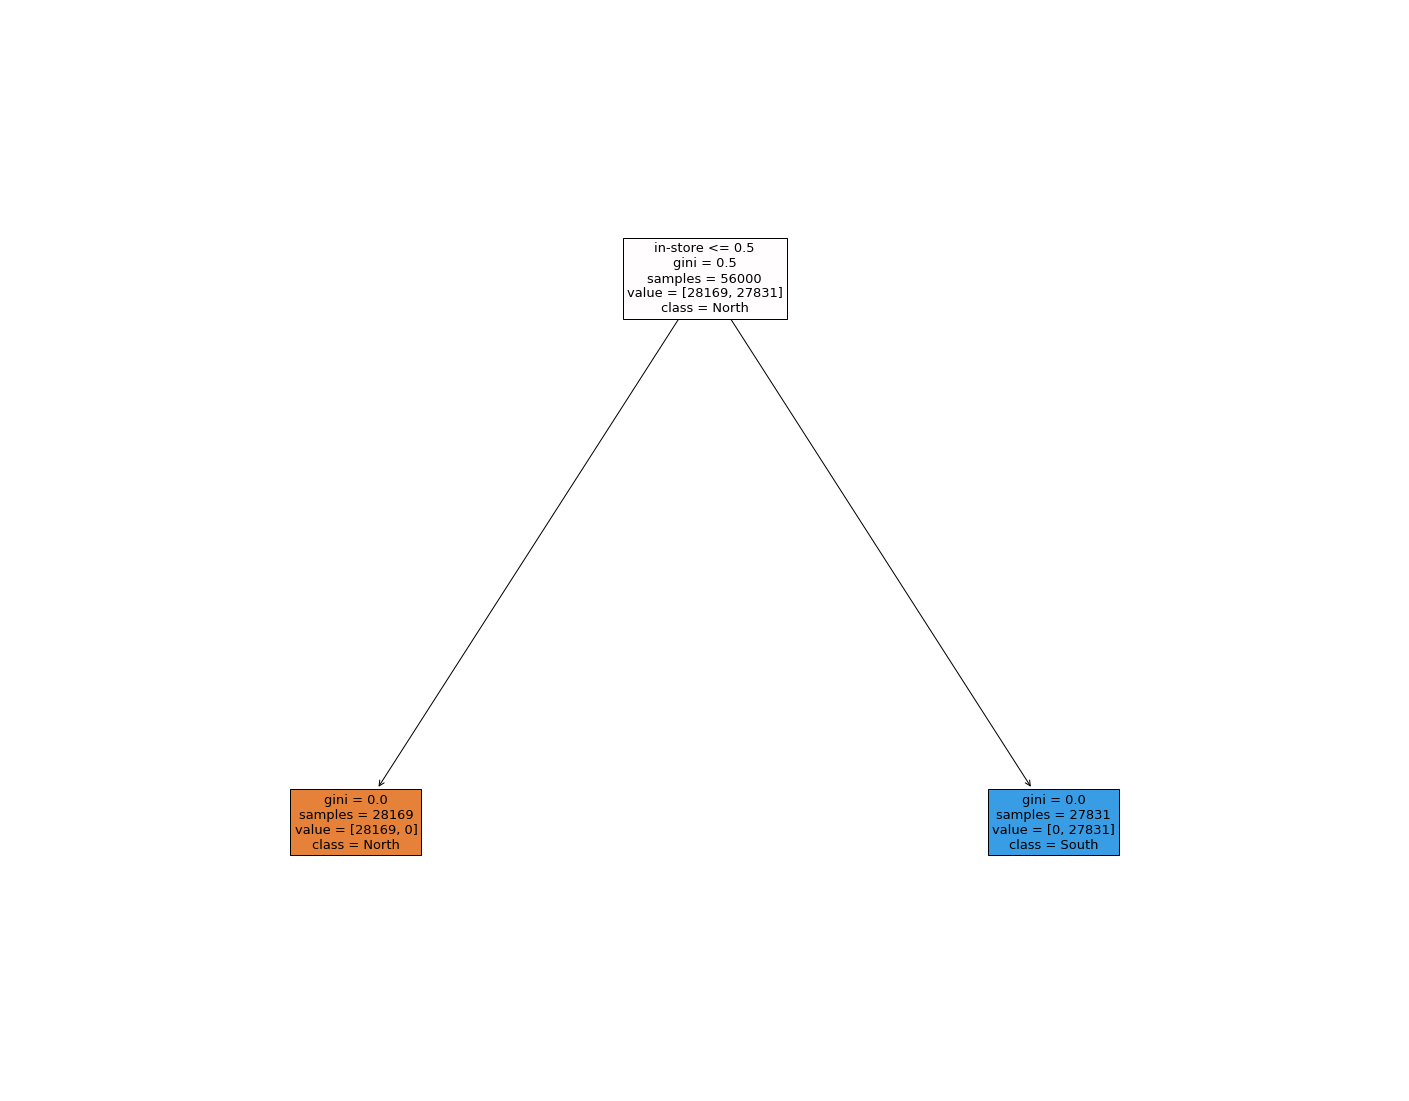

In [265]:
fig = plt.figure(figsize=(25,20))
tree = plot_tree(dtc, feature_names=X.columns, class_names=['North','South','East','West'], filled=True, fontsize=13)

Important conclusion: Based upon the above decision tree, we can determine based up our data that it is likely that the customers in the north region will make online purchases and customers in the Southern region will make purchases in-store.

# Using Random Forest Classifier
Random Forest Classifier: Works for both classification and regression tasks but works best with classification overall. It handles missing values and maintains accuracy. It will not overfit the model and can handle large data sets with higher dimensions. You have little control of what the model does so can be considered black box at times. In E-Commerce, it identifies likelihood of customers liking particular products within particular similarities in customers. 

In [234]:
#Using region as the dependent variable
y = data['region']

In [235]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [236]:
#Modeling (Classification)
rfc = RandomForestClassifier(n_estimators=100)
rfcFit1 = rfc.fit(X_train,y_train)

In [237]:
#Predictions
rfc1preds = model.predict(X_test)

In [238]:
print("Accuracy:", metrics.accuracy_score(y_test,rfc1preds))

Accuracy: 0.0


In [215]:
#Using in-store as the dependent variable
y = data['in-store']

In [216]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [217]:
#Modeling (Classification)
rfc = RandomForestClassifier(n_estimators=100)
rfcFit2 = rfc.fit(X_train,y_train)

In [218]:
#Predictions
rfc2preds = model.predict(X_test)

In [219]:
print("Accuracy:", metrics.accuracy_score(y_test,rfc2preds))

Accuracy: 1.0


In [232]:
print(classification_report(y_test, rfc2preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11831
           1       1.00      1.00      1.00     12169

    accuracy                           1.00     24000
   macro avg       1.00      1.00      1.00     24000
weighted avg       1.00      1.00      1.00     24000



# Using Gradient Boosting Classifier
Gradient Boosting Classifier: Works for both regression and classification problems. It is a method of converting weak hypothesis or machine learning algorithm and make a series of tweaks to it that it will improve the strength of the hypothesis into strong learner. 

In [222]:
#Using region as the dependent variable
y = data['region']

In [223]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [224]:
#Modeling (Classification)
gbc = GradientBoostingClassifier(max_depth=5,
    n_estimators=3,
    learning_rate=1.0)
gbcFit1 = gbc.fit(X_train,y_train)

In [225]:
#Predictions with Gradient Booster = 
gbc1preds = model.predict(X_test)

In [226]:
print("Accuracy:", metrics.accuracy_score(y_test,gbc1preds))

Accuracy: 0.0


In [227]:
#Using in-store as the dependent variable
y = data['in-store']

In [228]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [229]:
#Modeling (Classification)
gbc = GradientBoostingClassifier()
gbcFit2 = gbc.fit(X_train,y_train)

In [230]:
#Predictions
gbc2preds = model.predict(X_test)

In [231]:
print("Accuracy:", metrics.accuracy_score(y_test,rfc_instore_preds))

Accuracy: 0.0


### Helpful info for me to remember:
Classification: A tree model where the target variable can take a discrete set of values. In this model, the dependent variables are categorical, meaning they can be divided into groups. Examples: race, sex, age group, educational levels. Classification tree will make a prediction based off of the mode/class. Mode = what happens most often. 

Regression: A tree model where the target variable can take continuous values typically real number. Continuous data can take any value (within a range. Wil make a prediction based upon the mean. 


# Cross Validation Method

In [269]:
dtc = DecisionTreeClassifier()

In [270]:
print(cross_val_score(dtc, X, y, cv=3)) # cv = number of folds being held out

[1. 1. 1.]


Compare two classification algorithms. Lets go ahead and prepare each algorithm for use. For whatever reason, this was not fruitful and I was unable to compare the two algorithms.

In [271]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))

In [ ]:
#classification -- This would not function for me. I am unclear why as well. 
results = []
names = []
    for name, model in algos_Class:
    result = cross_val_score(rfc, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)